In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
import pandas as pd

## Prepare data
## 1 Get your X and y in the right shape
housing = pd.read_csv('housing.csv')
# Get your X (features) and y (target) in the right shape
# Conventionally, 'median_house_value' is the target (y)
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

print("Features: ", X.columns.tolist())

Features:  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']


In [25]:
X = housing.drop('median_house_value', axis=1)
print(X.shape)
X

(20640, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [26]:
X = housing.drop('median_house_value', axis=1).values
m = X.shape[0]  # Number of samples (rows)
n = X.shape[1]  # Number of features (columns)
print(X[0])

[-122.23 37.88 41.0 880.0 129.0 322.0 126.0 8.3252 'NEAR BAY']


In [27]:
y = housing['median_house_value'].values

print(y.shape)           # Small letter y represents a vector
print("values", y[0:3])  # Print the first three target values
print(y[0])              # Print the first target value

(20640,)
values [452600. 358500. 352100.]
452600.0


In [28]:
assert m == y.shape[0]

In [35]:
from sklearn.model_selection import train_test_split

X = housing.drop(['median_house_value', 'ocean_proximity'], axis=1).values
y = housing['median_house_value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
y_test.shape

(4128,)

In [37]:

print(X_train[0])

# Now scaling will work without the "could not convert string to float" error
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

[-118.95     35.37     34.     1672.      359.     1059.      349.
    2.1588]


In [38]:
X_train[0]

array([ 0.31146712, -0.12787635,  0.42550246, -0.44264625, -0.42213518,
       -0.32134224, -0.39156575, -0.89551662])

In [39]:
intercept = np.ones((X_train.shape[0], 1)) # add 1
X_train = np.concatenate((intercept, X_train), axis = 1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis = 1)
X_test[0]

array([ 1.        , -0.05788581,  0.55307029, -0.05278048, -0.35142968,
       -0.44367341, -0.46427883, -0.44427063, -0.35808492])

In [51]:
# 1.5. Feature Engineering (optional)

# It is sometimes useful to engineer new features (e.g., polynomial, kernels) so to create some non-linear relationships with your target. Here we gonna skip

from time import time

theta = np.zeros(X_train.shape[1])
lr = 0.001 # alpha
max_iter = 50

start = time()

for i in range(max_iter):
    # 1. prediction (X @ w)
    y_hat = X_train @ theta

    # 2. calculate gradient (X^T (h - y))
    grad = X_train.T @ (y_hat - y_train)

    # 3. update the theta (w = w - lr * grad)
    theta = theta - lr * grad

    print(f"step{i}")
    print(theta)

time_taken = time() - start

print("Time taken: ", time_taken)
print("Theta: ", theta)

step0
[ -88484.79140155 -272969.94132048  197986.0538946   255798.70993051
   91599.52790861  -49698.50737467  121637.5218983  1318515.50478025]
step1
[ -2459394.52571197   4519085.34133059   2029432.15537971
  -9476092.18213714  -5438102.87651769  -5512937.16921662
  -5896005.79085782 -19952313.87733488]
step2
[ 1.29940592e+08 -1.58847053e+08 -2.17258757e+08  4.79677707e+08
  4.20252368e+08  4.09604593e+08  4.27371684e+08  3.51740093e+08]
step3
[-6.43635359e+09  6.70413997e+09  1.35066659e+10 -2.88014560e+10
 -2.81405164e+10 -2.71954186e+10 -2.82937845e+10 -7.68074833e+09]
step4
[ 3.35793012e+11 -3.30870476e+11 -8.29693502e+11  1.80740384e+12
  1.81536649e+12  1.74928877e+12  1.82110165e+12  2.50817342e+11]
step5
[-1.88342729e+13  1.82055635e+13  5.18972879e+13 -1.14527734e+14
 -1.15825053e+14 -1.11476497e+14 -1.16138720e+14 -1.20282749e+13]
step6
[ 1.11577163e+15 -1.07118611e+15 -3.27685768e+15  7.26998654e+15
  7.36456188e+15  7.08423121e+15  7.38393901e+15  6.98145692e+14]
step7
[-

In [54]:
X = housing.drop('median_house_value', axis=1)
X.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [55]:
## 2.2 Compute accuracy/loss

#for regression, mean squared error
#for classification, accuracy, recall, precision


def mse(yhat, y):
   return  ((yhat - y)**2).sum() / yhat.shape[0]


#training mse
yhat_train = X_train @ theta

mse_train = mse(yhat_train, y_train)

print("MSE train: ", mse_train)

#testing mse

yhat_test = X_test @ theta

mse_test = mse(yhat_test, y_test)

print("MSE test: ", mse_test)

MSE train:  9.209703100524076e+187
MSE test:  nan


The reason you received a nan and an extremely large MSE is exploding gradients. In your previous code, you calculated the sum of the gradients instead of the average. Because the housing dataset has over 16,000 training samples, the update to theta was so massive that the numbers eventually exceeded the limits of a computer's memory, resulting in "Infinity" and "Not a Number" (nan).

So we can do divide by m instead


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load and prepare data (Drop text columns and NaN rows)
df = pd.read_csv('housing.csv').dropna()
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1).values
y = df['median_house_value'].values

# 2. Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Gradient Descent Parameters
m = X_train.shape[0]          # Number of training samples
theta = np.zeros(X_train.shape[1])
lr = 0.1                      # Learning rate (alpha)
max_iter = 100

# 4. Gradient Descent Loop
for i in range(max_iter):
    # 1. Prediction
    y_hat = X_train @ theta

    # 2. Calculate average gradient (The FIX: divide by m)
    grad = (1/m) * X_train.T @ (y_hat - y_train)

    # 3. Update theta
    theta = theta - lr * grad

# 5. Compute MSE
def mse(yhat, y):
   return ((yhat - y)**2).sum() / yhat.shape[0]

mse_train = mse(X_train @ theta, y_train)
mse_test = mse(X_test @ theta, y_test)

print("MSE train: ", mse_train)
print("MSE test: ", mse_test)

MSE train:  47811125760.35427
MSE test:  48297085422.12115


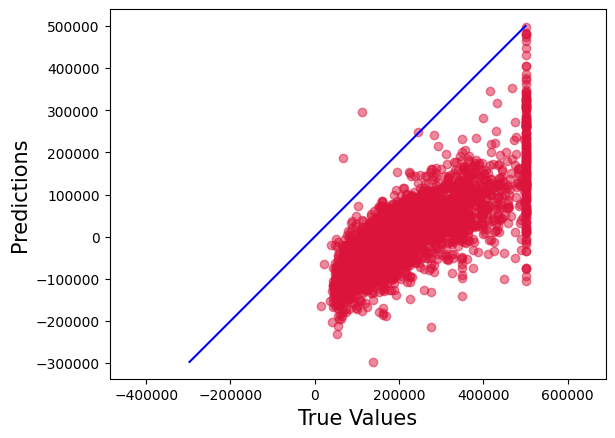

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load and Clean Data (to ensure no NaNs or Strings break the math)
df = pd.read_csv('housing.csv').dropna()
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1).values
y = df['median_house_value'].values

# 2. Split Data (Both X and y are split together to keep sizes identical)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Train Model (Gradient Descent)
m = X_train.shape[0]
theta = np.zeros(X_train.shape[1])
lr = 0.1
for i in range(100):
    y_hat = X_train @ theta
    grad = (1/m) * X_train.T @ (y_hat - y_train)
    theta = theta - lr * grad

# 5. Generate Predictions for the Test Set
# This ensures yhat_test has the same length as y_test (4,087 samples)
yhat_test = X_test @ theta

# 6. Plotting
plt.scatter(y_test, yhat_test, c='crimson', alpha=0.5)

# Add the identity line
p1 = max(max(yhat_test), max(y_test))
p2 = min(min(yhat_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()